# 2019 Paper
Problem 1

[[-0.00950585]
 [-0.03778289]
 [ 0.01281648]
 [-0.00950585]
 [-0.00270846]
 [ 0.00831648]]
[[ 10391.85841368]
 [  2303.78882929]
 [  9000.        ]
 [-10391.85841368]
 [ -2303.78882929]
 [ -2088.63351212]]


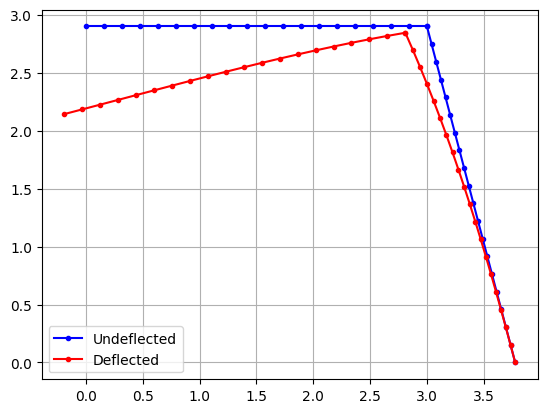

array([[[3.        , 3.04084211, 3.08168421, 3.12252632, 3.16336842,
         3.20421053, 3.24505263, 3.28589474, 3.32673684, 3.36757895,
         3.40842105, 3.44926316, 3.49010526, 3.53094737, 3.57178947,
         3.61263158, 3.65347368, 3.69431579, 3.73515789, 3.776     ],
        [2.8978    , 2.74528421, 2.59276842, 2.44025263, 2.28773684,
         2.13522105, 1.98270526, 1.83018947, 1.67767368, 1.52515789,
         1.37264211, 1.22012632, 1.06761053, 0.91509474, 0.76257895,
         0.61006316, 0.45754737, 0.30503158, 0.15251579, 0.        ]],

       [[2.80988295, 2.8749812 , 2.93799975, 2.99902617, 3.05814808,
         3.11545305, 3.1710287 , 3.22496262, 3.27734241, 3.32825566,
         3.37778997, 3.42603294, 3.47307216, 3.51899524, 3.56388976,
         3.60784333, 3.65094354, 3.69327799, 3.73493428, 3.776     ],
        [2.84363076, 2.69778425, 2.55138049, 2.40444295, 2.25699508,
         2.10906038, 1.9606623 , 1.81182432, 1.66256991, 1.51292255,
         1.3629057 , 1.212542

In [4]:
from FEA.FEA import *


I = 1e-5
A = 1e-3
E = 200e9
L = 3
angle_1 = 0
angle_2 = -75

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


element1 = FrameElement(A_1, E, I, L, A, angle_1, UDL=-2000)
element2 = FrameElement(A_2, E, I, L, A, angle_2)

Q = np.array([
    [0],
    [0],
    [0],
    [4914.9],
    [-3441.5],
    [0]
])

structure = Structure([element1, element2], Q)

structure.solve()

print(structure.q)
print(structure.elements[1].local_force)

nodes = np.array([
    [[0, 2.8978], [3, 2.8978]],
    [[3, 2.8978], [3.776, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2019 Paper
Problem 2

[[-78480.        ]
 [ 24000.        ]
 [ 76340.01205396]]
[[ 6.56702210e-05]
 [ 2.10512340e-02]
 [-1.20523386e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]
[-3.28351105e-05]


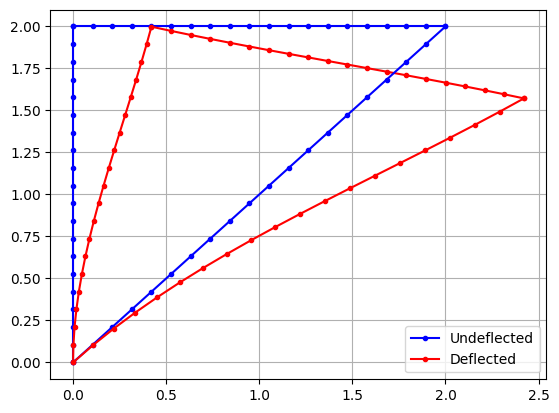

[0.00751253]


In [3]:
from FEA.FEA import *


I = 9e-6
A = 8e-4
E = 200e9
L_1 = L_2 = 2
L_3 = 2.83
angle_1 = -90
angle_2 = 0
angle_3 = -135

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


elements = [
    FrameElement(A_1, E, I, L_1, A, angle_1, LVL=78480),
    FrameElement(A_2, E, I, L_2, A, angle_2, UDL=-12000),
    FrameElement(A_3, E, I, L_3, A, angle_3)
]

Q = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

reaction_forces = structure.elements[0].global_force[3:6] + structure.elements[2].global_force[3:6] - structure.elements[0].LVL_F_eq[3:6]
print(reaction_forces)

print(structure.elements[0].element_deflections)
print(structure.elements[0].strain)

nodes = np.array([
    [[0, 2], [0, 0]],
    [[0, 2], [2, 2]],
    [[2, 2], [0, 0]]
])

structure.plot_structure(nodes, 20, 20)

deflection_mid_span = structure.elements[0].calculate_deflections(structure.elements[0].L/2)
print(deflection_mid_span[0])

# 2020 Paper
Problem 1

[[-173.64817767]
 [  -0.        ]
 [  -0.        ]
 [ 520.944533  ]
 [  -0.        ]
 [  -0.        ]]
[[ 1780.77920506]
 [  403.37974136]
 [ -561.45188774]
 [-1780.77920506]
 [ -403.37974136]
 [ -328.93771479]]
[[ 1250.25336415]
 [-2943.2610947 ]
 [  583.13039139]
 [-1250.25336415]
 [ 2943.2610947 ]
 [  308.62958425]]


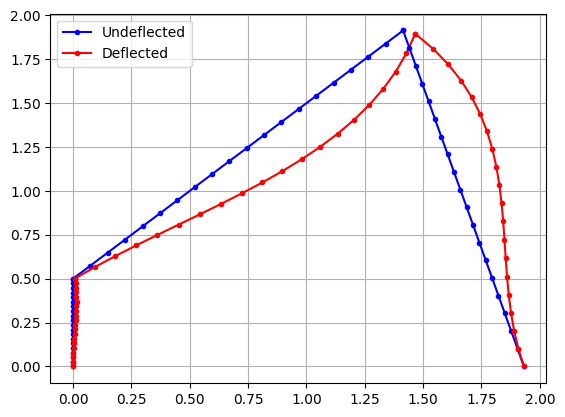

array([[[1.4142    , 1.44144211, 1.46868421, 1.49592632, 1.52316842,
         1.55041053, 1.57765263, 1.60489474, 1.63213684, 1.65937895,
         1.68662105, 1.71386316, 1.74110526, 1.76834737, 1.79558947,
         1.82283158, 1.85007368, 1.87731579, 1.90455789, 1.9318    ],
        [1.9142    , 1.81345263, 1.71270526, 1.61195789, 1.51121053,
         1.41046316, 1.30971579, 1.20896842, 1.10822105, 1.00747368,
         0.90672632, 0.80597895, 0.70523158, 0.60448421, 0.50373684,
         0.40298947, 0.30224211, 0.20149474, 0.10074737, 0.        ]],

       [[1.46635015, 1.54290775, 1.60798777, 1.66259489, 1.70773377,
         1.74440908, 1.77362548, 1.79638763, 1.8137002 , 1.82656785,
         1.83599524, 1.84298705, 1.84854793, 1.85368256, 1.85939558,
         1.86669167, 1.8765755 , 1.89005172, 1.908125  , 1.9318    ],
        [1.89539094, 1.80958302, 1.72069969, 1.62901016, 1.53478362,
         1.43828927, 1.33979632, 1.23957395, 1.13789138, 1.03501779,
         0.93122238, 0.826774

In [2]:
from FEA.FEA import *

I = 1e-6
A = 4e-4
E = 10e9
L_1 = 0.5
L_2 = 2
L_3 = 2
angle_1 = 90
angle_2 = 45
angle_3 = -75

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


elements = [
    FrameElement(A_1, E, I, L_1, A, angle_1),
    FrameElement(A_2, E, I, L_2, A, angle_2, point_load=(1.5, 10, -4e3)),
    FrameElement(A_3, E, I, L_3, A, angle_3)
]

Q = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

print(structure.elements[1].PL_f_axial)

print(structure.elements[0].global_force)
print(structure.elements[2].global_force)

nodes = np.array([
    [[0, 0.5], [0, 0]],
    [[0, 0.5], [1.4142, 1.4142+0.5]],
    [[1.4142, 1.4142+0.5], [1.4142+0.5176, 0]]
])

structure.plot_structure(nodes, 20, 20)